In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [2]:
df_train = pd.read_csv("titanic train.csv")
df_test = pd.read_csv("titanic test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_train.duplicated().sum()

0

In [7]:
columns = df_train.columns
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Survived', ylabel='count'>

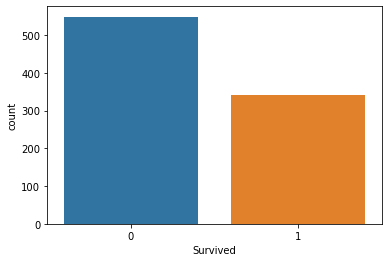

In [8]:
sns.countplot(x='Survived',data=df_train)

In [9]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

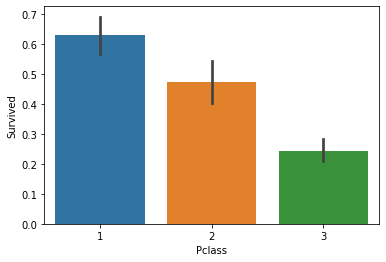

In [10]:
sns.barplot(df_train['Pclass'],df_train['Survived'])

In [11]:
missing_percentage = (df_train.isnull().sum())/(len(df_train))
missing_percentage

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [12]:
df_train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
E101           3
F2             3
              ..
B80            1
B4             1
E10            1
C30            1
D21            1
Name: Cabin, Length: 147, dtype: int64

In [13]:
df_train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [14]:
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
df_train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

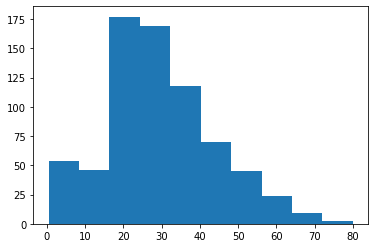

In [16]:
plt.hist(df_train['Age'])
plt.show()

In [17]:
df_train['Age'].isnull().sum()

177

In [18]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Age'>

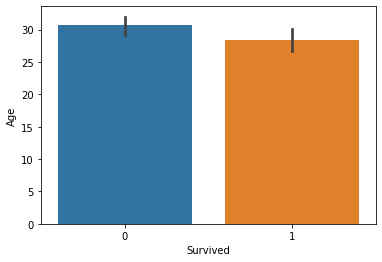

In [19]:
sns.barplot(df_train['Survived'],df_train['Age'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='Age'>

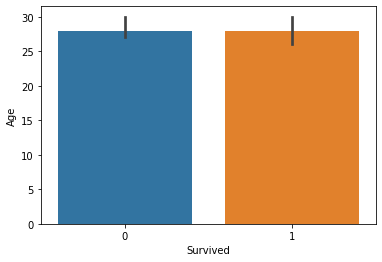

In [20]:
sns.barplot(df_train['Survived'],df_train['Age'],estimator=np.median)

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

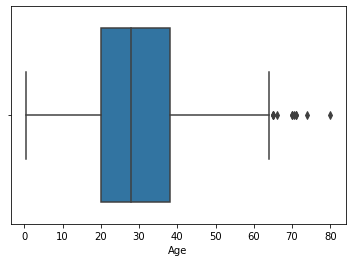

In [21]:
sns.boxplot(df_train['Age'])

In [22]:
q1 = df_train["Age"].quantile(0.25)
q3 = df_train["Age"].quantile(0.75)
iqr = q3-q1
print(iqr)

17.875


In [23]:
q1- 1.5*iqr , q1+ 1.5*iqr

(-6.6875, 46.9375)

In [24]:
df_train["Age"].mean() , df_train['Age'].median()

(29.69911764705882, 28.0)

In [25]:
df_train['Age']=df_train['Age'].fillna(df_train['Age'].median())

In [26]:
df_train['Age'].value_counts()

28.00    202
24.00     30
22.00     27
18.00     26
19.00     25
        ... 
55.50      1
74.00      1
0.92       1
70.50      1
12.00      1
Name: Age, Length: 88, dtype: int64

In [27]:
df_train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
df_train['Age']=df_train['Age'].astype('int64')

In [30]:
df_train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.064909
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 83.7+ KB


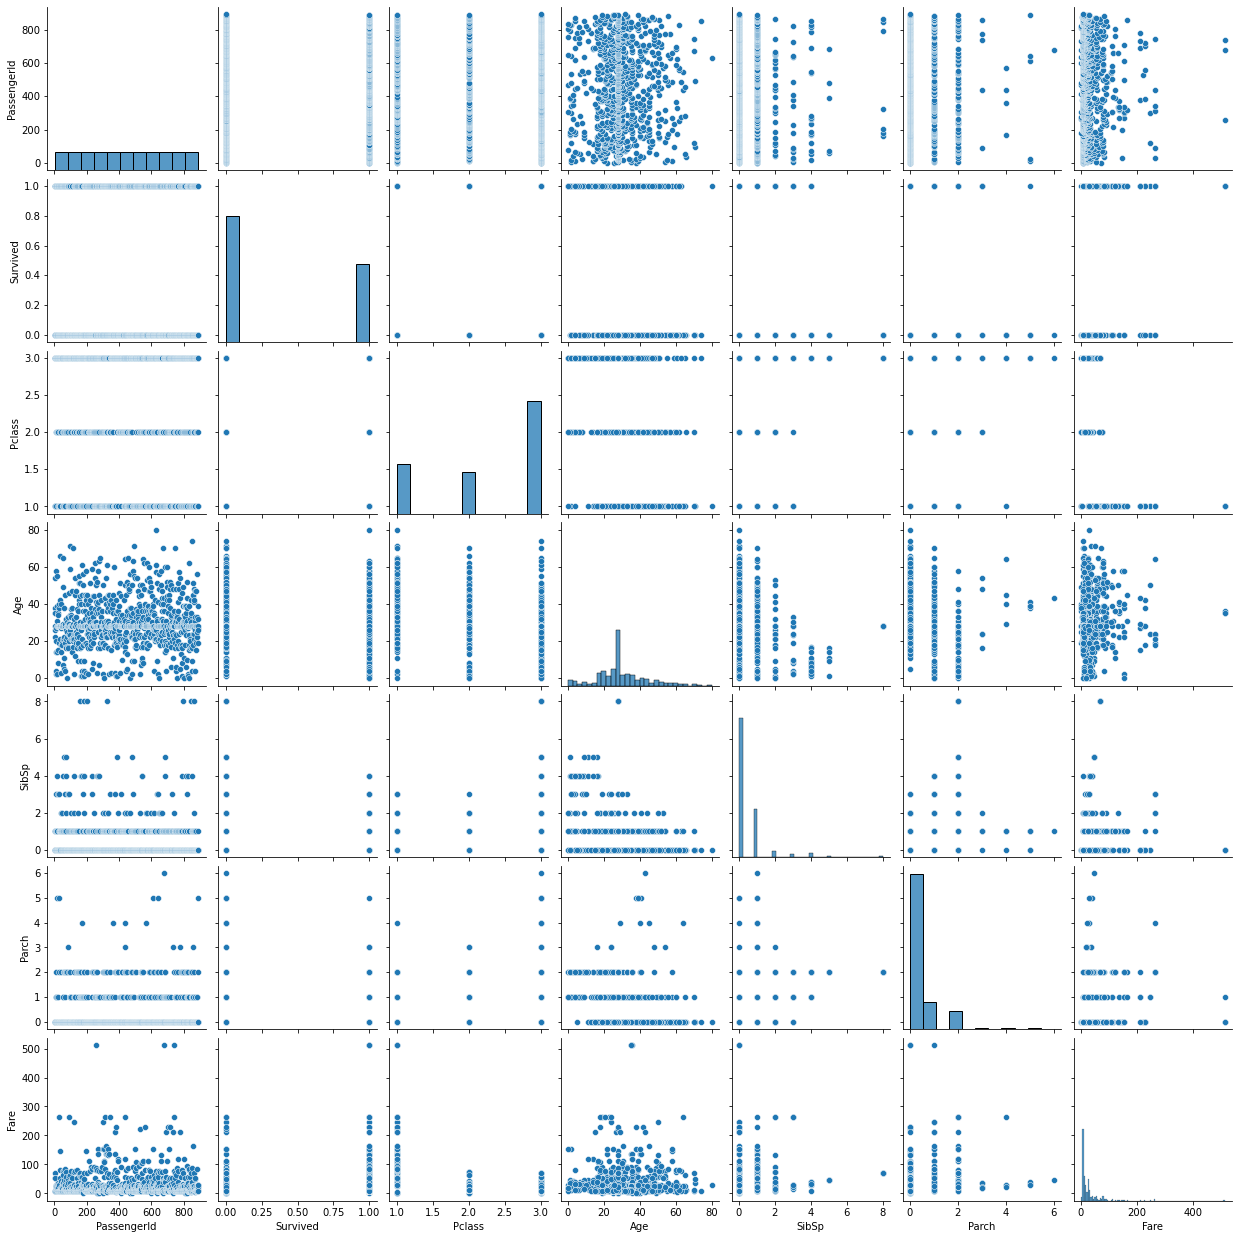

In [32]:
sns.pairplot(df_train)

In [33]:
df_train.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Kassem, Mr. Fared",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [34]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

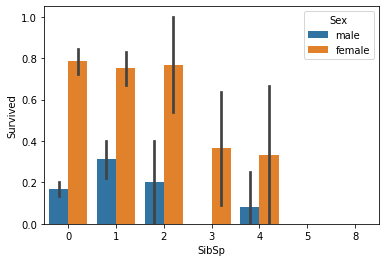

In [35]:
sns.barplot(df_train['SibSp'],df_train['Survived'],hue=df_train['Sex'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

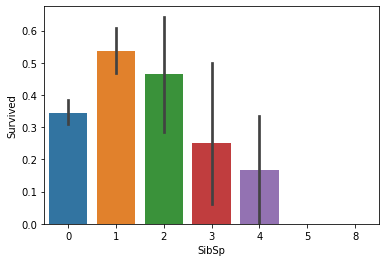

In [36]:
sns.barplot(df_train['SibSp'],df_train['Survived'])

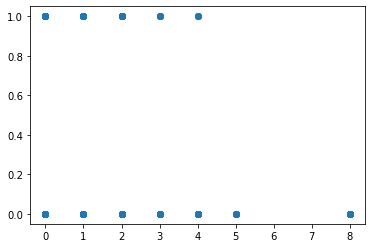

In [37]:
plt.scatter(df_train['SibSp'],df_train['Survived'])
plt.show()

In [38]:
df_train['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

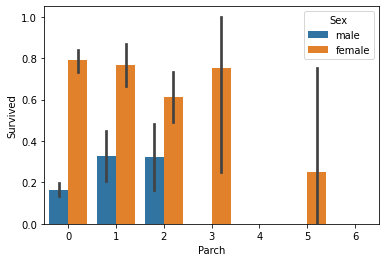

In [39]:
sns.barplot(df_train['Parch'],df_train['Survived'],hue=df_train['Sex'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

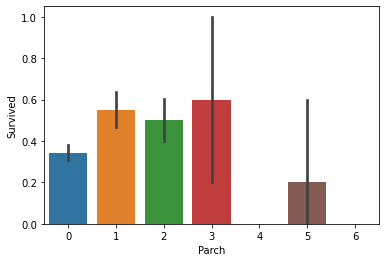

In [40]:
sns.barplot(df_train['Parch'],df_train['Survived'])

In [41]:
df_train.corr()['Parch']

PassengerId   -0.001652
Survived       0.081629
Pclass         0.018443
Age           -0.172745
SibSp          0.414838
Parch          1.000000
Fare           0.216225
Name: Parch, dtype: float64

In [42]:
df_train.corr()['SibSp']

PassengerId   -0.057527
Survived      -0.035322
Pclass         0.083081
Age           -0.233066
SibSp          1.000000
Parch          0.414838
Fare           0.159651
Name: SibSp, dtype: float64

In [43]:
df_train['family_members'] = df_train['SibSp'] + df_train['Parch']

In [44]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_members
570,571,1,2,"Harris, Mr. George",male,62,0,0,S.W./PP 752,10.5000,NaN,S,0
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,28,0,0,239853,0.0000,NaN,S,0
753,754,0,3,"Jonkoff, Mr. Lalio",male,23,0,0,349204,7.8958,NaN,S,0
680,681,0,3,"Peters, Miss. Katie",female,28,0,0,330935,8.1375,NaN,Q,0
253,254,0,3,"Lobb, Mr. William Arthur",male,30,1,0,A/5. 3336,16.1000,NaN,S,1


In [45]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family_members
PassengerId,1.000000,-0.005007,-0.035144,0.034322,-0.057527,-0.001652,0.012658,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.064909,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.035144,-0.338481,1.000000,-0.339999,0.083081,0.018443,-0.549500,0.065997
Age,0.034322,-0.064909,-0.339999,1.000000,-0.233066,-0.172745,0.096838,-0.245593
SibSp,-0.057527,-0.035322,0.083081,-0.233066,1.000000,0.414838,0.159651,0.890712
Parch,-0.001652,0.081629,0.018443,-0.172745,0.414838,1.000000,0.216225,0.783111
Fare,0.012658,0.257307,-0.549500,0.096838,0.159651,0.216225,1.000000,0.217138
family_members,-0.040143,0.016639,0.065997,-0.245593,0.890712,0.783111,0.217138,1.000000


In [46]:
df_train.drop(columns=['SibSp','Parch'],inplace=True)

In [47]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_members
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16,SOTON/OQ 392089,8.0500,NaN,S,0
399,400,1,2,"Trout, Mrs. William H (Jessie L)",female,28,240929,12.6500,NaN,S,0
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4,347082,31.2750,NaN,S,6
154,155,0,3,"Olsen, Mr. Ole Martin",male,28,Fa 265302,7.3125,NaN,S,0
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,28,2661,15.2458,NaN,C,2


In [48]:
df_train['family_members'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: family_members, dtype: int64

In [49]:
df_train['family_members'] == 0

0      False
1      False
2       True
3      False
4       True
       ...  
886     True
887     True
888    False
889     True
890     True
Name: family_members, Length: 891, dtype: bool

In [50]:
df_train['family_members'] = np.where(df_train['family_members'] == 0 , 0 , 1)

In [51]:
df_train['family_members'].value_counts()

0    537
1    354
Name: family_members, dtype: int64

In [52]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_members
61,62,1,1,"Icard, Miss. Amelie",female,38,113572,80.0000,B28,NaN,0
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17,3101281,7.9250,NaN,S,1
598,599,0,3,"Boulos, Mr. Hanna",male,28,2664,7.2250,NaN,C,0
78,79,1,2,"Caldwell, Master. Alden Gates",male,0,248738,29.0000,NaN,S,1
826,827,0,3,"Lam, Mr. Len",male,28,1601,56.4958,NaN,S,0


In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    object 
 5   Age             891 non-null    int64  
 6   Ticket          891 non-null    object 
 7   Fare            891 non-null    float64
 8   Cabin           204 non-null    object 
 9   Embarked        889 non-null    object 
 10  family_members  891 non-null    int32  
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 73.2+ KB


In [54]:
df_train.corr()['Survived']

PassengerId      -0.005007
Survived          1.000000
Pclass           -0.338481
Age              -0.064909
Fare              0.257307
family_members    0.203367
Name: Survived, dtype: float64

In [55]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

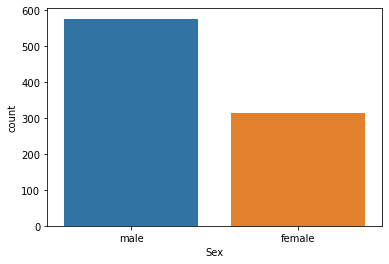

In [56]:
sns.countplot(x=df_train['Sex'],data=df_train)

In [57]:
df_train['Sex'] = df_train['Sex'].replace('male',0)
df_train['Sex'] = df_train['Sex'].replace('female',1)

In [58]:
df_train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

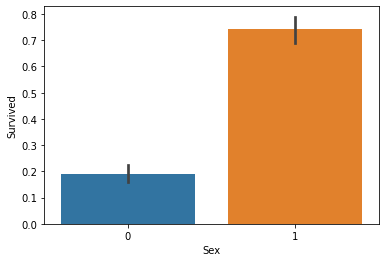

In [59]:
sns.barplot(df_train['Sex'],df_train['Survived'])

In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    int64  
 5   Age             891 non-null    int64  
 6   Ticket          891 non-null    object 
 7   Fare            891 non-null    float64
 8   Cabin           204 non-null    object 
 9   Embarked        889 non-null    object 
 10  family_members  891 non-null    int32  
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 73.2+ KB


In [61]:
# left = age,name,embarked,ticket,fare

In [62]:
df_train['Cabin'].duplicated().sum()

743

In [63]:
df_train.drop(['Cabin'],inplace=True,axis=1)

In [64]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members
0,1,0,3,"Braund, Mr. Owen Harris",0,22,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35,373450,8.0500,S,0


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='Age'>

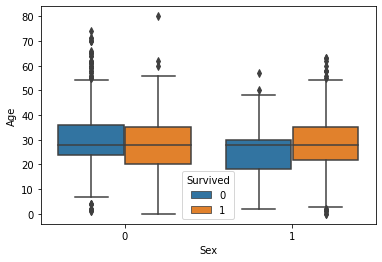

In [65]:
sns.boxplot(df_train['Sex'],df_train['Age'],hue=df_train['Survived'])

In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    int64  
 5   Age             891 non-null    int64  
 6   Ticket          891 non-null    object 
 7   Fare            891 non-null    float64
 8   Embarked        889 non-null    object 
 9   family_members  891 non-null    int32  
dtypes: float64(1), int32(1), int64(5), object(3)
memory usage: 66.3+ KB


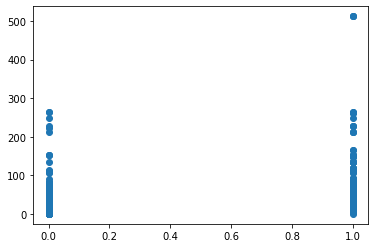

In [67]:
plt.scatter(df_train['Survived'],df_train['Fare'])
plt.show()

In [68]:
df_train['Fare'].value_counts().index.max() ,df_train['Fare'].value_counts().index.min()

(512.3292, 0.0)

In [69]:
# fare aur age ko pd.cut lgana hai
# ticket ko use krna hai

In [70]:
df_train['Fare_reformed']=pd.cut(df_train['Fare'] , 5 , labels=['100','200','300','400','500'])

In [71]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members,Fare_reformed
0,1,0,3,"Braund, Mr. Owen Harris",0,22,A/5 21171,7.2500,S,1,100
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,PC 17599,71.2833,C,1,100
2,3,1,3,"Heikkinen, Miss. Laina",1,26,STON/O2. 3101282,7.9250,S,0,100
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,113803,53.1000,S,1,100
4,5,0,3,"Allen, Mr. William Henry",0,35,373450,8.0500,S,0,100


In [72]:
df_train['Fare_reformed'].value_counts()

100    838
200     33
300     17
500      3
400      0
Name: Fare_reformed, dtype: int64

In [73]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    int64   
 1   Survived        891 non-null    int64   
 2   Pclass          891 non-null    int64   
 3   Name            891 non-null    object  
 4   Sex             891 non-null    int64   
 5   Age             891 non-null    int64   
 6   Ticket          891 non-null    object  
 7   Fare            891 non-null    float64 
 8   Embarked        889 non-null    object  
 9   family_members  891 non-null    int32   
 10  Fare_reformed   891 non-null    category
dtypes: category(1), float64(1), int32(1), int64(5), object(3)
memory usage: 67.3+ KB


In [74]:
df_train['Fare_reformed']=df_train['Fare_reformed'].astype('int64')

In [75]:
df_train.corr()['Survived']

PassengerId      -0.005007
Survived          1.000000
Pclass           -0.338481
Sex               0.543351
Age              -0.064909
Fare              0.257307
family_members    0.203367
Fare_reformed     0.165780
Name: Survived, dtype: float64

In [76]:
df_train['TicketFare'] = np.where(df_train['Fare_reformed']==100, 0 ,1)

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PassengerId     891 non-null    int64  
 1   Survived        891 non-null    int64  
 2   Pclass          891 non-null    int64  
 3   Name            891 non-null    object 
 4   Sex             891 non-null    int64  
 5   Age             891 non-null    int64  
 6   Ticket          891 non-null    object 
 7   Fare            891 non-null    float64
 8   Embarked        889 non-null    object 
 9   family_members  891 non-null    int32  
 10  Fare_reformed   891 non-null    int64  
 11  TicketFare      891 non-null    int32  
dtypes: float64(1), int32(2), int64(6), object(3)
memory usage: 76.7+ KB


In [78]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_members,Fare_reformed,TicketFare
434,435,0,1,"Silvey, Mr. William Baird",0,50,13507,55.9000,S,1,100,0
391,392,1,3,"Jansson, Mr. Carl Olof",0,21,350034,7.7958,S,0,100,0
283,284,1,3,"Dorking, Mr. Edward Arthur",0,19,A/5. 10482,8.0500,S,0,100,0
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",1,15,2667,7.2250,C,0,100,0
521,522,0,3,"Vovk, Mr. Janko",0,22,349252,7.8958,S,0,100,0


In [79]:
df_train.corr()['Survived']

PassengerId      -0.005007
Survived          1.000000
Pclass           -0.338481
Sex               0.543351
Age              -0.064909
Fare              0.257307
family_members    0.203367
Fare_reformed     0.165780
TicketFare        0.182033
Name: Survived, dtype: float64

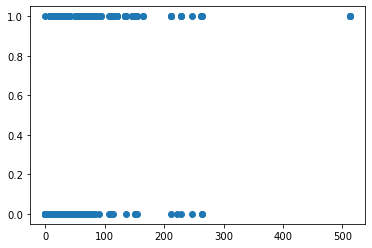

In [80]:
plt.scatter(df_train['Fare'],df_train['Survived'])
plt.show()

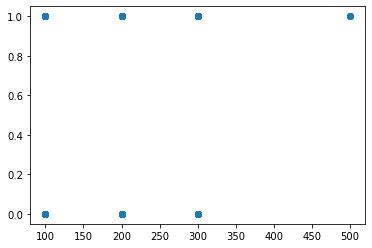

In [81]:
plt.scatter(df_train['Fare_reformed'],df_train['Survived'])
plt.show()

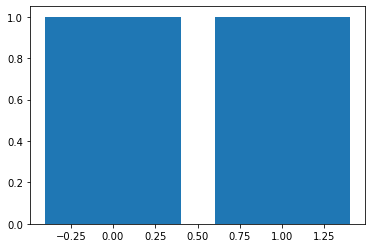

In [82]:
plt.bar(df_train['TicketFare'],df_train['Survived'])
plt.show()

In [83]:
df_train.corr()

,PassengerId,Survived,Pclass,Sex,Age,Fare,family_members,Fare_reformed,TicketFare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034322,0.012658,-0.057462,0.020746,0.011567
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.064909,0.257307,0.203367,0.165780,0.182033
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.339999,-0.549500,-0.135207,-0.347834,-0.393856
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.080750,0.182333,0.303646,0.118639,0.152189
Age,0.034322,-0.064909,-0.339999,-0.080750,1.000000,0.096838,-0.171807,0.039662,0.042884
Fare,0.012658,0.257307,-0.549500,0.182333,0.096838,1.000000,0.271832,0.907337,0.783993
family_members,-0.057462,0.203367,-0.135207,0.303646,-0.171807,0.271832,1.000000,0.118427,0.154594
Fare_reformed,0.020746,0.165780,-0.347834,0.118639,0.039662,0.907337,0.118427,1.000000,0.883151
TicketFare,0.011567,0.182033,-0.393856,0.152189,0.042884,0.783993,0.154594,0.883151,1.000000


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TicketFare', ylabel='Survived'>

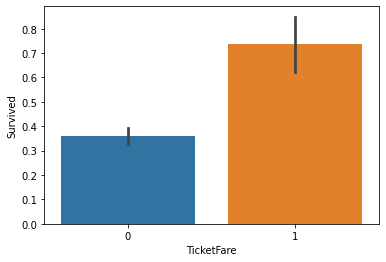

In [84]:
sns.barplot(df_train['TicketFare'],df_train['Survived'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare_reformed', ylabel='Survived'>

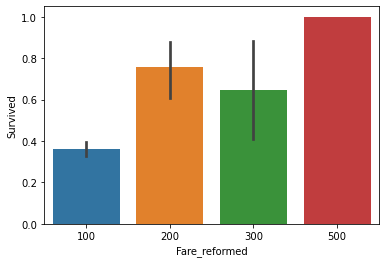

In [85]:
sns.barplot(df_train['Fare_reformed'],df_train['Survived'])

In [86]:
df_train.drop(['Fare','TicketFare'],inplace=True,axis=1)

In [87]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Embarked,family_members,Fare_reformed
0,1,0,3,"Braund, Mr. Owen Harris",0,22,A/5 21171,S,1,100
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,PC 17599,C,1,100
2,3,1,3,"Heikkinen, Miss. Laina",1,26,STON/O2. 3101282,S,0,100
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,113803,S,1,100
4,5,0,3,"Allen, Mr. William Henry",0,35,373450,S,0,100


In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   PassengerId     891 non-null    int64 
 1   Survived        891 non-null    int64 
 2   Pclass          891 non-null    int64 
 3   Name            891 non-null    object
 4   Sex             891 non-null    int64 
 5   Age             891 non-null    int64 
 6   Ticket          891 non-null    object
 7   Embarked        889 non-null    object
 8   family_members  891 non-null    int32 
 9   Fare_reformed   891 non-null    int64 
dtypes: int32(1), int64(6), object(3)
memory usage: 66.3+ KB


In [89]:
df_train['Fare_reformed']=df_train['Fare_reformed'].astype(object)

In [90]:
df_train.corr()['Survived']

PassengerId      -0.005007
Survived          1.000000
Pclass           -0.338481
Sex               0.543351
Age              -0.064909
family_members    0.203367
Name: Survived, dtype: float64

In [91]:
df_train['Age'].unique()

array([22, 38, 26, 35, 28, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
        8, 19, 40, 66, 42, 21, 18,  3,  7, 49, 29, 65,  5, 11, 45, 17, 32,
       16, 25,  0, 30, 33, 23, 24, 46, 59, 71, 37, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74], dtype=int64)

In [92]:
df_train['New_age']=pd.cut(df_train['Age'],8,labels=['10','20','30','40','50','60','70','80'])

In [93]:
df_train['New_age'].value_counts()

30    408
40    155
20    116
50     84
10     64
60     42
70     18
80      4
Name: New_age, dtype: int64

In [94]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    int64   
 1   Survived        891 non-null    int64   
 2   Pclass          891 non-null    int64   
 3   Name            891 non-null    object  
 4   Sex             891 non-null    int64   
 5   Age             891 non-null    int64   
 6   Ticket          891 non-null    object  
 7   Embarked        889 non-null    object  
 8   family_members  891 non-null    int32   
 9   Fare_reformed   891 non-null    object  
 10  New_age         891 non-null    category
dtypes: category(1), int32(1), int64(5), object(4)
memory usage: 67.5+ KB


In [95]:
df_train['Embarked'].isnull().sum()

2

In [96]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

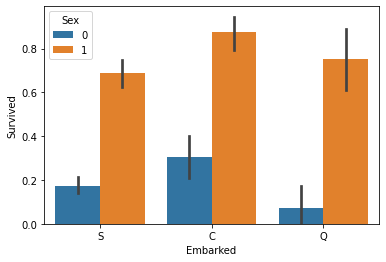

In [97]:
sns.barplot(df_train["Embarked"],df_train['Survived'],hue=df_train['Sex'])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

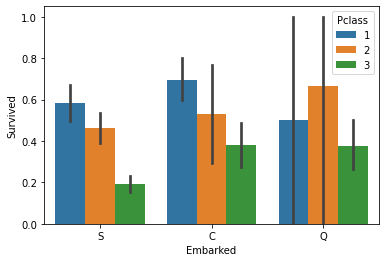

In [98]:
sns.barplot(df_train["Embarked"],df_train['Survived'],hue=df_train['Pclass'])

In [99]:
df_train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [100]:
df_train['Embarked']=df_train['Embarked'].replace('S',0)
df_train['Embarked']=df_train['Embarked'].replace('C',1)
df_train['Embarked']=df_train['Embarked'].replace('Q',2)

In [101]:
df_train['Embarked'].unique()

array([ 0.,  1.,  2., nan])

In [102]:
df_train['Embarked']=df_train['Embarked'].fillna(0)

In [103]:
df_train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Embarked,family_members,Fare_reformed,New_age
531,532,0,3,"Toufik, Mr. Nakli",0,28,2641,1.0,0,100,30
252,253,0,1,"Stead, Mr. William Thomas",0,62,113514,0.0,0,100,70
387,388,1,2,"Buss, Miss. Kate",1,36,27849,0.0,0,100,40
359,360,1,3,"Mockler, Miss. Helen Mary ""Ellie""",1,28,330980,2.0,0,100,30
354,355,0,3,"Yousif, Mr. Wazli",0,28,2647,1.0,0,100,30


In [104]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    int64   
 1   Survived        891 non-null    int64   
 2   Pclass          891 non-null    int64   
 3   Name            891 non-null    object  
 4   Sex             891 non-null    int64   
 5   Age             891 non-null    int64   
 6   Ticket          891 non-null    object  
 7   Embarked        891 non-null    float64 
 8   family_members  891 non-null    int32   
 9   Fare_reformed   891 non-null    object  
 10  New_age         891 non-null    category
dtypes: category(1), float64(1), int32(1), int64(5), object(3)
memory usage: 67.5+ KB


In [105]:
df_train['Embarked']=df_train['Embarked'].astype('int64')

In [106]:
df_train['family_members']=df_train['family_members'].astype('int64')

In [107]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    int64   
 1   Survived        891 non-null    int64   
 2   Pclass          891 non-null    int64   
 3   Name            891 non-null    object  
 4   Sex             891 non-null    int64   
 5   Age             891 non-null    int64   
 6   Ticket          891 non-null    object  
 7   Embarked        891 non-null    int64   
 8   family_members  891 non-null    int64   
 9   Fare_reformed   891 non-null    object  
 10  New_age         891 non-null    category
dtypes: category(1), int64(7), object(3)
memory usage: 71.0+ KB


In [108]:
df_train.corr()['Survived']

PassengerId      -0.005007
Survived          1.000000
Pclass           -0.338481
Sex               0.543351
Age              -0.064909
Embarked          0.106811
family_members    0.203367
Name: Survived, dtype: float64

In [109]:
df_train['Ticket'].duplicated().sum()

210

In [110]:
df_train['Ticket'].nunique()

681

In [111]:
df_train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [112]:
df_train.drop(['Ticket'],inplace=True,axis=1)

In [113]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,family_members,Fare_reformed,New_age
0,1,0,3,"Braund, Mr. Owen Harris",0,22,0,1,100,30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,1,100,40
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,100,30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,0,1,100,40
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,100,40


In [114]:
df_train.corr()['Survived']

PassengerId      -0.005007
Survived          1.000000
Pclass           -0.338481
Sex               0.543351
Age              -0.064909
Embarked          0.106811
family_members    0.203367
Name: Survived, dtype: float64

In [115]:
df_train['Name']=df_train['Name'].str.split(expand=True)[1]

In [116]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,family_members,Fare_reformed,New_age
0,1,0,3,Mr.,0,22,0,1,100,30
1,2,1,1,Mrs.,1,38,1,1,100,40
2,3,1,3,Miss.,1,26,0,0,100,30
3,4,1,1,Mrs.,1,35,0,1,100,40
4,5,0,3,Mr.,0,35,0,0,100,40


In [117]:
df_train['Name'].value_counts()

Mr.             502
Miss.           179
Mrs.            121
Master.          40
Dr.               7
Rev.              6
y                 4
Impe,             3
Planke,           3
Mlle.             2
Col.              2
Gordon,           2
Major.            2
Don.              1
Mme.              1
Capt.             1
Billiard,         1
Jonkheer.         1
Melkebeke,        1
Shawah,           1
Mulder,           1
the               1
Ms.               1
Carlo,            1
Cruyssen,         1
Messemaeker,      1
Walle,            1
Pelsmaeker,       1
Velde,            1
der               1
Steen,            1
Name: Name, dtype: int64

In [118]:
df_train['Name']=df_train['Name'].replace('Mr.',0)
df_train['Name']=df_train['Name'].replace('Miss.',1)
df_train['Name']=df_train['Name'].replace('Mrs.',2)
df_train['Name']=df_train['Name'].replace('Master.',3)

In [119]:
df_train['Name']

0         0
1         2
2         1
3         2
4         0
       ... 
886    Rev.
887       1
888       1
889       0
890       0
Name: Name, Length: 891, dtype: object

In [120]:
count=df_train['Name'].value_counts()
threshold=10

In [121]:
repl = count[count<threshold].index
repl

Index(['Dr.', 'Rev.', 'y', 'Impe,', 'Planke,', 'Gordon,', 'Col.', 'Major.',
       'Mlle.', 'Velde,', 'Capt.', 'Jonkheer.', 'Billiard,', 'Melkebeke,',
       'Don.', 'Mulder,', 'Shawah,', 'Mme.', 'Pelsmaeker,', 'the', 'Ms.',
       'der', 'Carlo,', 'Cruyssen,', 'Messemaeker,', 'Walle,', 'Steen,'],
      dtype='object')

In [122]:
df_train['Name']=df_train['Name'].replace(repl,4)

In [123]:
df_train['Name'].value_counts()

0    502
1    179
2    121
4     49
3     40
Name: Name, dtype: int64

In [124]:
df_train.corr()['Survived']

PassengerId      -0.005007
Survived          1.000000
Pclass           -0.338481
Name              0.346617
Sex               0.543351
Age              -0.064909
Embarked          0.106811
family_members    0.203367
Name: Survived, dtype: float64

In [125]:
df_train.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,family_members
PassengerId,1.000000,-0.005007,-0.035144,0.013257,-0.042939,0.034322,-0.030467,-0.057462
Survived,-0.005007,1.000000,-0.338481,0.346617,0.543351,-0.064909,0.106811,0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.141897,-0.131900,-0.339999,0.045702,-0.135207
Name,0.013257,0.346617,-0.141897,1.000000,0.440324,-0.084300,0.036047,0.364408
Sex,-0.042939,0.543351,-0.131900,0.440324,1.000000,-0.080750,0.116569,0.303646
Age,0.034322,-0.064909,-0.339999,-0.084300,-0.080750,1.000000,-0.009539,-0.171807
Embarked,-0.030467,0.106811,0.045702,0.036047,0.116569,-0.009539,1.000000,-0.017807
family_members,-0.057462,0.203367,-0.135207,0.364408,0.303646,-0.171807,-0.017807,1.000000


In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
x=df_train.select_dtypes("int64")

In [128]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

          feature       VIF
0     PassengerId  3.620727
1        Survived  2.368465
2          Pclass  4.074476
3            Name  2.057025
4             Sex  2.533113
5             Age  3.724292
6        Embarked  1.358991
7  family_members  1.899111


In [129]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Embarked,family_members,Fare_reformed,New_age
0,1,0,3,0,0,22,0,1,100,30
1,2,1,1,2,1,38,1,1,100,40
2,3,1,3,1,1,26,0,0,100,30
3,4,1,1,2,1,35,0,1,100,40
4,5,0,3,0,0,35,0,0,100,40


In [130]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    int64   
 1   Survived        891 non-null    int64   
 2   Pclass          891 non-null    int64   
 3   Name            891 non-null    int64   
 4   Sex             891 non-null    int64   
 5   Age             891 non-null    int64   
 6   Embarked        891 non-null    int64   
 7   family_members  891 non-null    int64   
 8   Fare_reformed   891 non-null    object  
 9   New_age         891 non-null    category
dtypes: category(1), int64(8), object(1)
memory usage: 64.0+ KB


## Exploring Test data

In [131]:
df_test = pd.read_csv("titanic test.csv")

In [132]:
import copy
original_copy = df_test.copy(deep=True)

In [133]:
original_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [134]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [135]:
df_test.shape

(418, 11)

In [136]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [137]:
original_copy.drop(['Cabin','Ticket'],axis=1,inplace=True)

In [138]:
original_copy['Sex']=original_copy['Sex'].map({'male':0,'female':1})

In [139]:
original_copy['Name']=original_copy['Name'].str.split(expand=True)

In [140]:
original_copy['Name']=original_copy['Name'].replace('Mr.',0)
original_copy['Name']=original_copy['Name'].replace('Miss.',1)
original_copy['Name']=original_copy['Name'].replace('Mrs.',2)
original_copy['Name']=original_copy['Name'].replace('Master.',3)

In [141]:
count=original_copy['Name'].value_counts()
threshold=10

In [142]:
repl=count[count<threshold].index
repl

Index(['Davies,', 'Ware,', 'Sage,', 'Thomas,', 'Asplund,', 'Ryerson,',
       'Howard,', 'Peacock,', 'Nilsson,', 'Kink-Heilmann,',
       ...
       'Greenfield,', 'Lennon,', 'Wright,', 'Henriksson,', 'Canavan,',
       'Oreskovic,', 'Badman,', 'Carr,', 'Crosby,', 'Sandstrom,'],
      dtype='object', length=351)

In [143]:
original_copy['Name']=original_copy['Name'].replace(repl,4)

In [144]:
original_copy.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,4,0,34.5,0,0,7.8292,Q
1,893,3,4,1,47.0,1,0,7.0000,S
2,894,2,4,0,62.0,0,0,9.6875,Q
3,895,3,4,0,27.0,0,0,8.6625,S
4,896,3,4,1,22.0,1,1,12.2875,S


In [145]:
original_copy['family_members'] = original_copy['SibSp'] + original_copy['Parch']

In [146]:
original_copy['family_members'] = np.where(original_copy['family_members']==0,0,1)

In [147]:
original_copy.drop(['SibSp','Parch'],axis=1,inplace=True)

In [148]:
original_copy.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,family_members
0,892,3,4,0,34.5,7.8292,Q,0
1,893,3,4,1,47.0,7.0000,S,1
2,894,2,4,0,62.0,9.6875,Q,0
3,895,3,4,0,27.0,8.6625,S,0
4,896,3,4,1,22.0,12.2875,S,1


In [149]:
original_copy['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [150]:
original_copy['Embarked']=original_copy['Embarked'].replace('S',0)
original_copy['Embarked']=original_copy['Embarked'].replace('C',1)
original_copy['Embarked']=original_copy['Embarked'].replace('Q',2)

In [151]:
original_copy['Embarked']=original_copy['Embarked'].astype('int64')

In [152]:
original_copy['Fare_reformed']=pd.cut(df_test['Fare'] , 5 , labels=['100','200','300','400','500'])
original_copy['Fare_reformed'].value_counts()
original_copy['Fare_reformed']=original_copy['Fare_reformed'].astype(object)

In [153]:
original_copy['Fare_reformed']=original_copy['Fare_reformed'].astype('category')

In [154]:
original_copy.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,family_members,Fare_reformed
0,892,3,4,0,34.5,7.8292,2,0,100
1,893,3,4,1,47.0,7.0000,0,1,100
2,894,2,4,0,62.0,9.6875,2,0,100
3,895,3,4,0,27.0,8.6625,0,0,100
4,896,3,4,1,22.0,12.2875,0,1,100


In [155]:
original_copy.drop(['Fare'],axis=1,inplace=True)

In [156]:
original_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     418 non-null    int64   
 1   Pclass          418 non-null    int64   
 2   Name            418 non-null    int64   
 3   Sex             418 non-null    int64   
 4   Age             332 non-null    float64 
 5   Embarked        418 non-null    int64   
 6   family_members  418 non-null    int32   
 7   Fare_reformed   417 non-null    category
dtypes: category(1), float64(1), int32(1), int64(5)
memory usage: 22.0 KB


In [157]:
original_copy['family_members']=original_copy['family_members'].astype('int64')

In [158]:
original_copy['Age'].mean() , original_copy['Age'].median()

(30.272590361445783, 27.0)

In [159]:
original_copy['Age']=original_copy['Age'].fillna(original_copy['Age'].median())

In [160]:
original_copy['New_age']=pd.cut(original_copy['Age'],8,labels=['10','20','30','40','50','60','70','80'])
original_copy['New_age'].value_counts()

30    200
40     68
50     45
20     41
60     28
10     20
70     14
80      2
Name: New_age, dtype: int64

In [161]:
original_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     418 non-null    int64   
 1   Pclass          418 non-null    int64   
 2   Name            418 non-null    int64   
 3   Sex             418 non-null    int64   
 4   Age             418 non-null    float64 
 5   Embarked        418 non-null    int64   
 6   family_members  418 non-null    int64   
 7   Fare_reformed   417 non-null    category
 8   New_age         418 non-null    category
dtypes: category(2), float64(1), int64(6)
memory usage: 24.4 KB


In [162]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   PassengerId     891 non-null    int64   
 1   Survived        891 non-null    int64   
 2   Pclass          891 non-null    int64   
 3   Name            891 non-null    int64   
 4   Sex             891 non-null    int64   
 5   Age             891 non-null    int64   
 6   Embarked        891 non-null    int64   
 7   family_members  891 non-null    int64   
 8   Fare_reformed   891 non-null    object  
 9   New_age         891 non-null    category
dtypes: category(1), int64(8), object(1)
memory usage: 64.0+ KB


In [163]:
df_train.drop(['PassengerId'],axis=1,inplace=True)

In [164]:
original_copy.drop(['PassengerId'],axis=1,inplace=True)

In [165]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [166]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,Embarked,family_members,Fare_reformed,New_age
0,0,3,0,0,22,0,1,100,30
1,1,1,2,1,38,1,1,100,40
2,1,3,1,1,26,0,0,100,30
3,1,1,2,1,35,0,1,100,40
4,0,3,0,0,35,0,0,100,40


In [167]:
df_train['Fare_reformed'].value_counts()

100    838
200     33
300     17
500      3
Name: Fare_reformed, dtype: int64

In [168]:
original_copy['Fare_reformed'].value_counts()

100    386
300     17
200     13
500      1
Name: Fare_reformed, dtype: int64

In [169]:
df_train['New_age'].value_counts()

30    408
40    155
20    116
50     84
10     64
60     42
70     18
80      4
Name: New_age, dtype: int64

In [170]:
original_copy['New_age'].value_counts()

30    200
40     68
50     45
20     41
60     28
10     20
70     14
80      2
Name: New_age, dtype: int64

In [171]:
df_train['Fare_reformed']=df_train['Fare_reformed'].astype('int64')

In [172]:
df_train['Fare_reformed']=df_train['Fare_reformed'].replace(100,0)
df_train['Fare_reformed']=df_train['Fare_reformed'].replace(200,1)
df_train['Fare_reformed']=df_train['Fare_reformed'].replace(300,2)
df_train['Fare_reformed']=df_train['Fare_reformed'].replace(500,3)
df_train['Fare_reformed']=df_train['Fare_reformed'].replace(400,4)

In [173]:
df_train['Fare_reformed'].value_counts()

0    838
1     33
2     17
3      3
Name: Fare_reformed, dtype: int64

In [174]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Survived        891 non-null    int64   
 1   Pclass          891 non-null    int64   
 2   Name            891 non-null    int64   
 3   Sex             891 non-null    int64   
 4   Age             891 non-null    int64   
 5   Embarked        891 non-null    int64   
 6   family_members  891 non-null    int64   
 7   Fare_reformed   891 non-null    int64   
 8   New_age         891 non-null    category
dtypes: category(1), int64(8)
memory usage: 57.0 KB


In [175]:
xtrain,xtest,ytrain,ytest=train_test_split(df_train.drop(['Survived'],axis=1) , df_train['Survived'] , test_size=0.15)

In [176]:
print(xtrain.shape , xtest.shape , ytrain.shape , ytest.shape)

(757, 8) (134, 8) (757,) (134,)


In [177]:
xtrain

,Pclass,Name,Sex,Age,Embarked,family_members,Fare_reformed,New_age
50,3,3,0,7,0,1,0,10
821,3,0,0,27,0,0,0,30
55,1,0,0,28,0,0,0,30
721,3,0,0,17,0,1,0,20
613,3,0,0,28,2,0,0,30
...,...,...,...,...,...,...,...,...
204,3,0,0,18,0,0,0,20
265,2,0,0,36,0,0,0,40
244,3,0,0,30,1,0,0,30
129,3,0,0,45,0,0,0,50


In [178]:
oe = OrdinalEncoder(categories=[['10','20','30','40','50','60','70','80']])

In [179]:
xtrain['New_age'] = oe.fit_transform(xtrain[['New_age']])

In [180]:
xtrain['New_age'].shape

(757,)

In [181]:
xtest['New_age'] = oe.transform(xtest[['New_age']])

In [182]:
xtest['New_age'].shape

(134,)

In [183]:
xtrain

,Pclass,Name,Sex,Age,Embarked,family_members,Fare_reformed,New_age
50,3,3,0,7,0,1,0,0.0
821,3,0,0,27,0,0,0,2.0
55,1,0,0,28,0,0,0,2.0
721,3,0,0,17,0,1,0,1.0
613,3,0,0,28,2,0,0,2.0
...,...,...,...,...,...,...,...,...
204,3,0,0,18,0,0,0,1.0
265,2,0,0,36,0,0,0,3.0
244,3,0,0,30,1,0,0,2.0
129,3,0,0,45,0,0,0,4.0


In [184]:
df_train['Fare_reformed'].value_counts()

0    838
1     33
2     17
3      3
Name: Fare_reformed, dtype: int64

In [185]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 50 to 685
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          757 non-null    int64  
 1   Name            757 non-null    int64  
 2   Sex             757 non-null    int64  
 3   Age             757 non-null    int64  
 4   Embarked        757 non-null    int64  
 5   family_members  757 non-null    int64  
 6   Fare_reformed   757 non-null    int64  
 7   New_age         757 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 53.2 KB


In [186]:
xtrain.corr()

,Pclass,Name,Sex,Age,Embarked,family_members,Fare_reformed,New_age
Pclass,1.000000,-0.134479,-0.145150,-0.337433,0.013401,-0.133923,-0.358760,-0.344345
Name,-0.134479,1.000000,0.417628,-0.083730,0.023576,0.388609,0.034352,-0.068780
Sex,-0.145150,0.417628,1.000000,-0.075686,0.114154,0.319493,0.120473,-0.074760
Age,-0.337433,-0.083730,-0.075686,1.000000,0.001020,-0.172209,0.039427,0.975965
Embarked,0.013401,0.023576,0.114154,0.001020,1.000000,-0.009757,0.083768,-0.032935
family_members,-0.133923,0.388609,0.319493,-0.172209,-0.009757,1.000000,0.145458,-0.143952
Fare_reformed,-0.358760,0.034352,0.120473,0.039427,0.083768,0.145458,1.000000,0.043535
New_age,-0.344345,-0.068780,-0.074760,0.975965,-0.032935,-0.143952,0.043535,1.000000


In [187]:
xtrain['New_age']=xtrain['New_age'].astype('int64')

In [188]:
x=xtrain.select_dtypes('int64')

In [189]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

          feature         VIF
0          Pclass    4.687875
1            Name    1.977547
2             Sex    1.930156
3             Age  103.379224
4        Embarked    1.365301
5  family_members    2.029725
6   Fare_reformed    1.162492
7         New_age   81.808465


In [190]:
xtrain.drop(['Age'],axis=1,inplace=True)

In [191]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

          feature         VIF
0          Pclass    4.687875
1            Name    1.977547
2             Sex    1.930156
3             Age  103.379224
4        Embarked    1.365301
5  family_members    2.029725
6   Fare_reformed    1.162492
7         New_age   81.808465


In [192]:
xtest

,Pclass,Name,Sex,Age,Embarked,family_members,Fare_reformed,New_age
111,3,1,1,14,1,1,0,1.0
435,1,1,1,14,0,1,1,1.0
557,1,0,0,28,1,0,2,2.0
625,1,0,0,61,0,0,0,6.0
53,2,2,1,29,0,1,0,2.0
...,...,...,...,...,...,...,...,...
371,3,0,0,18,0,1,0,1.0
411,3,0,0,28,2,0,0,2.0
25,3,2,1,38,0,1,0,3.0
591,1,2,1,52,1,1,0,5.0


In [193]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 111 to 370
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          134 non-null    int64  
 1   Name            134 non-null    int64  
 2   Sex             134 non-null    int64  
 3   Age             134 non-null    int64  
 4   Embarked        134 non-null    int64  
 5   family_members  134 non-null    int64  
 6   Fare_reformed   134 non-null    int64  
 7   New_age         134 non-null    float64
dtypes: float64(1), int64(7)
memory usage: 9.4 KB


In [194]:
xtest['New_age']=xtest['New_age'].astype('int64')

In [195]:
xtest.drop(['Age'],axis=1,inplace=True)

In [196]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 111 to 370
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Pclass          134 non-null    int64
 1   Name            134 non-null    int64
 2   Sex             134 non-null    int64
 3   Embarked        134 non-null    int64
 4   family_members  134 non-null    int64
 5   Fare_reformed   134 non-null    int64
 6   New_age         134 non-null    int64
dtypes: int64(7)
memory usage: 8.4 KB


In [197]:
ytrain

50     0
821    1
55     1
721    0
613    0
      ..
204    1
265    0
244    0
129    0
685    0
Name: Survived, Length: 757, dtype: int64

In [198]:
ytest

111    0
435    1
557    0
625    0
53     1
      ..
371    0
411    0
25     1
591    1
370    1
Name: Survived, Length: 134, dtype: int64

In [199]:
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

# confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
# sn.heatmap(confusion_matrix, annot=True)

# print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

In [200]:
from sklearn import metrics

In [201]:
confusion_matrix = pd.crosstab(ytest, ypred, rownames=['Actual'], colnames=['Predicted'])

In [202]:
confusion_matrix

Predicted,0,1
Actual,,
0,64,15
1,9,46


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

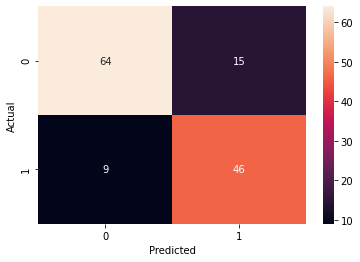

In [203]:
sns.heatmap(confusion_matrix,annot=True)

In [204]:
print('The Accuracy Score Of This Project is : ',accuracy_score(ytest,ypred))

The Accuracy Score Of This Project is :  0.8208955223880597


In [205]:
ypred1 = lr.predict(xtrain)

In [206]:
training_accuracy = accuracy_score(ytrain, ypred1)

print('TRAINING ACCURACY IS :', training_accuracy)

TRAINING ACCURACY IS : 0.809775429326288


In [207]:
testing_accuracy = accuracy_score(ytest, ypred)

print('TESTING ACCURACY IS :', testing_accuracy)

TESTING ACCURACY IS : 0.8208955223880597


In [208]:
original_copy.head()

,Pclass,Name,Sex,Age,Embarked,family_members,Fare_reformed,New_age
0,3,4,0,34.5,2,0,100,40
1,3,4,1,47.0,0,1,100,50
2,2,4,0,62.0,2,0,100,70
3,3,4,0,27.0,0,0,100,30
4,3,4,1,22.0,0,1,100,30


In [209]:
original_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Pclass          418 non-null    int64   
 1   Name            418 non-null    int64   
 2   Sex             418 non-null    int64   
 3   Age             418 non-null    float64 
 4   Embarked        418 non-null    int64   
 5   family_members  418 non-null    int64   
 6   Fare_reformed   417 non-null    category
 7   New_age         418 non-null    category
dtypes: category(2), float64(1), int64(5)
memory usage: 21.1 KB


In [210]:
original_copy['Fare_reformed']=original_copy['Fare_reformed'].fillna(original_copy['Fare_reformed'].mode()[0])

In [211]:
original_copy['Fare_reformed']=original_copy['Fare_reformed'].astype('int64')

In [212]:
original_copy['Fare_reformed']=original_copy['Fare_reformed'].replace(100,0)
original_copy['Fare_reformed']=original_copy['Fare_reformed'].replace(200,1)
original_copy['Fare_reformed']=original_copy['Fare_reformed'].replace(300,2)
original_copy['Fare_reformed']=original_copy['Fare_reformed'].replace(500,3)
original_copy['Fare_reformed']=original_copy['Fare_reformed'].replace(400,4)

In [213]:
original_copy['Fare_reformed'].value_counts()

0    387
2     17
1     13
3      1
Name: Fare_reformed, dtype: int64

In [214]:
original_copy['New_age'].unique()

['40', '50', '70', '30', '20', '60', '10', '80']
Categories (8, object): ['10' < '20' < '30' < '40' < '50' < '60' < '70' < '80']

In [215]:
oe2 = OrdinalEncoder(categories=[['10','20','30','40','50','60','70','80']])

In [216]:
original_copy['New_age']=oe2.fit_transform(original_copy[['New_age']])

In [217]:
original_copy['New_age'].value_counts()

2.0    200
3.0     68
4.0     45
1.0     41
5.0     28
0.0     20
6.0     14
7.0      2
Name: New_age, dtype: int64

In [218]:
original_copy['New_age'].unique()

array([3., 4., 6., 2., 1., 5., 0., 7.])

In [219]:
original_copy['New_age']=original_copy['New_age'].astype('int64')

In [220]:
original_copy.drop(['Age'],axis=1,inplace=True)

In [221]:
original_copy.head()

,Pclass,Name,Sex,Embarked,family_members,Fare_reformed,New_age
0,3,4,0,2,0,0,3
1,3,4,1,0,1,0,4
2,2,4,0,2,0,0,6
3,3,4,0,0,0,0,2
4,3,4,1,0,1,0,2


In [222]:
original_copy.shape

(418, 7)

In [223]:
Final_Model = lr.fit(xtrain,ytrain)

In [224]:
Final_Predictions = Final_Model.predict(original_copy)

In [225]:
len(Final_Predictions)

418

In [226]:
Final_Predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [227]:
original_copy.head()

,Pclass,Name,Sex,Embarked,family_members,Fare_reformed,New_age
0,3,4,0,2,0,0,3
1,3,4,1,0,1,0,4
2,2,4,0,2,0,0,6
3,3,4,0,0,0,0,2
4,3,4,1,0,1,0,2


In [228]:
round(lr.score(xtrain, ytrain) * 100, 2)

80.98

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Survived', ylabel='Density'>

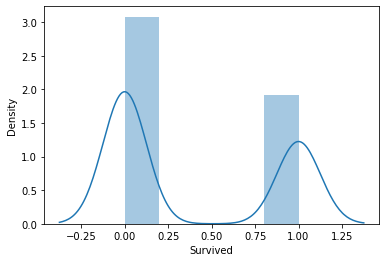

In [229]:
sns.distplot(df_train['Survived'])

In [230]:
X_test  = original_copy.copy()

In [231]:
X_test

,Pclass,Name,Sex,Embarked,family_members,Fare_reformed,New_age
0,3,4,0,2,0,0,3
1,3,4,1,0,1,0,4
2,2,4,0,2,0,0,6
3,3,4,0,0,0,0,2
4,3,4,1,0,1,0,2
...,...,...,...,...,...,...,...
413,3,4,0,0,0,0,2
414,1,4,1,1,0,1,4
415,3,4,0,0,0,0,4
416,3,4,0,0,0,0,2


In [232]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,Embarked,family_members,Fare_reformed,New_age
0,0,3,0,0,22,0,1,0,30
1,1,1,2,1,38,1,1,0,40
2,1,3,1,1,26,0,0,0,30
3,1,1,2,1,35,0,1,0,40
4,0,3,0,0,35,0,0,0,40


In [233]:
df_train.drop(['Age'],axis=1,inplace=True)

In [234]:
df_train['New_age']=oe2.fit_transform(df_train[['New_age']])

In [235]:
df_train['New_age'].value_counts()

2.0    408
3.0    155
1.0    116
4.0     84
0.0     64
5.0     42
6.0     18
7.0      4
Name: New_age, dtype: int64

In [236]:
df_train['New_age']=df_train['New_age'].astype('int64')

In [237]:
df_train.head()

,Survived,Pclass,Name,Sex,Embarked,family_members,Fare_reformed,New_age
0,0,3,0,0,0,1,0,2
1,1,1,2,1,1,1,0,3
2,1,3,1,1,0,0,0,2
3,1,1,2,1,0,1,0,3
4,0,3,0,0,0,0,0,3


In [238]:
original_copy.head()

,Pclass,Name,Sex,Embarked,family_members,Fare_reformed,New_age
0,3,4,0,2,0,0,3
1,3,4,1,0,1,0,4
2,2,4,0,2,0,0,6
3,3,4,0,0,0,0,2
4,3,4,1,0,1,0,2


In [239]:
xtrain.shape , xtest.shape , ytrain.shape , ytest.shape , ypred.shape

((757, 7), (134, 7), (757,), (134,), (134,))

In [240]:
df_train.head(1)

,Survived,Pclass,Name,Sex,Embarked,family_members,Fare_reformed,New_age
0,0,3,0,0,0,1,0,2


In [241]:
X_train = df_train.drop("Survived", axis=1)
Y_train = df_train["Survived"]
X_test  = original_copy.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [242]:
results = pd.read_csv('gender_submission.csv')
results[:]

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [243]:
# logreg = LogisticRegression()
# logreg.fit(X_train, Y_train)
# Y_pred = logreg.predict(X_test)
# acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
# acc_log

In [244]:
confusion_matrix = pd.crosstab(results['Survived'],Final_Predictions,rownames = ['Actual'],colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,196,70
1,0,152


In [260]:
confusion_matrix = pd.crosstab(results['Survived'],Y_pred,rownames = ['Actual'],colnames=['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,201,65
1,0,152


In [268]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
print("Accuracy:",metrics.accuracy_score(results['Survived'], Y_pred))
print("Precision:",metrics.precision_score(results['Survived'], Y_pred))
print("Recall:",metrics.recall_score(results['Survived'], Y_pred))

Accuracy: 0.8444976076555024
Precision: 0.7004608294930875
Recall: 1.0


In [246]:
len(Y_pred)

418

In [247]:
y_test=results['Survived']
y_test
# type(y_test) , type(Y_pred)

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [248]:
from sklearn.metrics import precision_score,recall_score
recall=recall_score(Y_pred,results['Survived'])
precision=precision_score(Y_pred,results['Survived'])
print('recall is '+ str(recall))
print('precision is '+ str(precision))
print('accuracy is '+ str((261+152)/418))

recall is 0.7004608294930875
precision is 1.0
accuracy is 0.9880382775119617


In [269]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

y_pred_knn = knn.predict(X_test)

# Making the Confusion Matrix
cm = pd.crosstab(results['Survived'],y_pred_knn,rownames = ['Actual'],colnames=['Predicted'])
print(cm)

Predicted    0   1
Actual            
0          209  57
1           71  81


In [271]:
from sklearn. model_selection import cross_val_score
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, X_train,Y_train, cv=5)
print(cv)
print(cv.mean())

[0.78212291 0.78651685 0.79775281 0.79213483 0.82022472]
0.7957504237022157


In [291]:
from sklearn.ensemble import RandomForestClassifier
# regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
# regressor.fit(X_train, Y_train)
# Y_pred = regressor.predict(X_test)
# acc_reg = round(regressor.score(X_train, Y_train) * 100, 2)
# acc_reg

In [252]:
regressor = RandomForestRegressor()
cv = cross_val_score(regressor, xtrain, ytrain, cv=5)
print(cv)
print(cv.mean())

[0.26790227 0.37846293 0.47536653 0.17903544 0.39599683]
0.3393527966049154


In [253]:
Final_Predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [272]:
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [254]:
df_test.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [277]:
first_col = df_test['PassengerId']
second_col = Y_pred

FinalSubmission = pd.DataFrame({'PassengerId':first_col , 'Survived':second_col})
FinalSubmission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [278]:
len(FinalSubmission)

418

In [289]:
FinalSubmission.to_csv(r'C:\Users\Acer\Downloads\FinalSubmission.csv',  index=False)

In [283]:
print(FinalSubmission)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [286]:
pd.read_csv('C:\\Users\\Acer\\Downloads\\FinalSubmission.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# import csv

# f = open("Submission.csv", "w")
# writer = csv.DictWriter(
#     f, fieldnames=["PassengerId", "Survived"])
# writer.writeheader()
# f.close()
# # Outputfruits.csvfruit,count

In [287]:
cm = pd.crosstab(results['Survived'],Y_pred,rownames = ['Actual'],colnames=['Predicted'])
print(cm)

Predicted    0    1
Actual             
0          201   65
1            0  152


In [288]:
print("Accuracy:",metrics.accuracy_score(results['Survived'], Y_pred))

Accuracy: 0.8444976076555024


In [293]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.86

In [295]:
submission = pd.DataFrame({
        "PassengerId": df_test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv(r'C:\Users\Acer\Downloads\submission.csv', index=False)

In [297]:
pd.read_csv('C:\\Users\\Acer\\Downloads\\submission.csv')

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
